**Import libraries**

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import *


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Read the data**

In [0]:
data = pd.read_csv("drive/My Drive/data/U.S._Chronic_Disease_Indicators.csv")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Overview of the data**

In [0]:
#le type de l'objet
print(type(data))

#la taille de la dataset
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(403984, 34)


In [0]:
#les colonnes de la dataset
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [0]:
#savoir les 17 topics de la data
data.Topic.value_counts()


Diabetes                                           67342
Cardiovascular Disease                             62678
Chronic Obstructive Pulmonary Disease              52536
Asthma                                             31958
Arthritis                                          31652
Overarching Conditions                             30092
Nutrition, Physical Activity, and Weight Status    29512
Alcohol                                            27697
Tobacco                                            24568
Cancer                                             11605
Chronic Kidney Disease                             11525
Oral Health                                         7593
Mental Health                                       5595
Older Adults                                        4003
Immunization                                        3838
Reproductive Health                                 1735
Disability                                            55
Name: Topic, dtype: int64

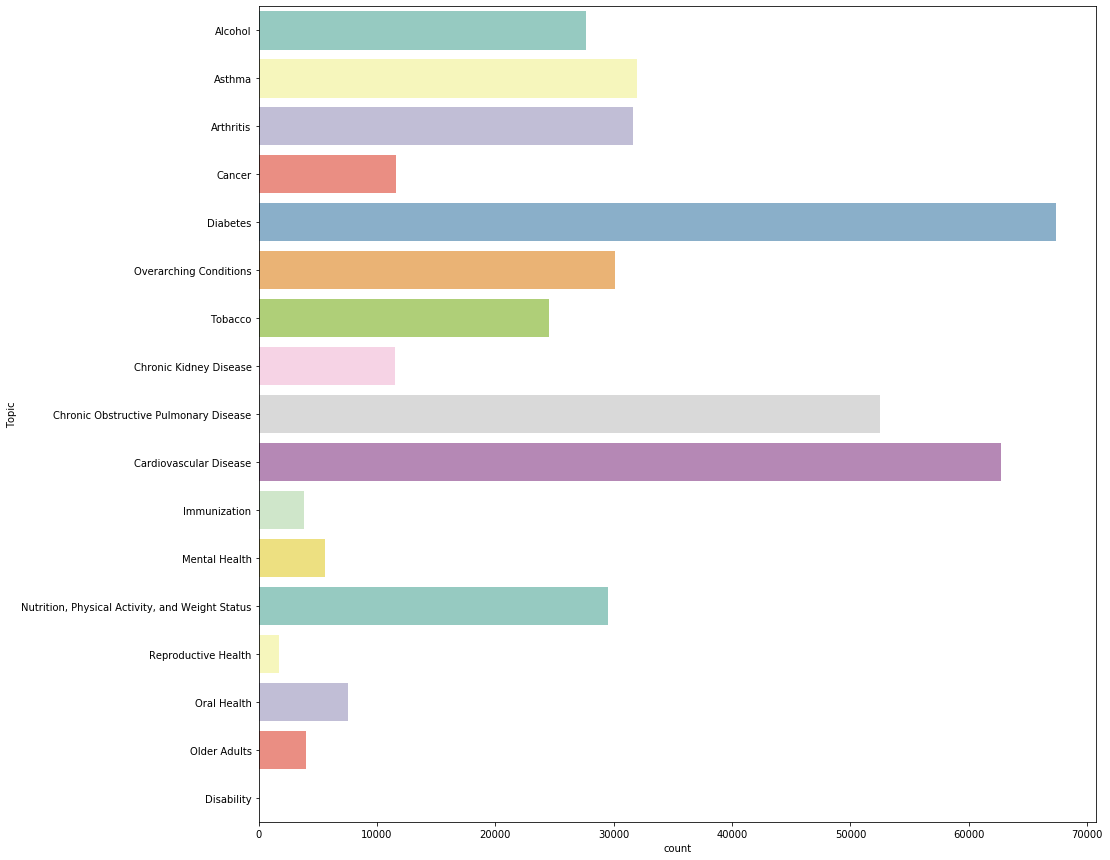

In [0]:
#visualization des topics
sns.countplot(y = 'Topic', data = data, palette = 'Set3')
plt.show()


In [0]:
#savoir les questions de la data
data.Question.value_counts()


Mortality from heart failure                                                                 6136
Mortality from coronary heart disease                                                        6135
Premature mortality among adults aged 45-64 years                                            6135
Mortality from cerebrovascular disease (stroke)                                              6135
Asthma mortality rate                                                                        6135
                                                                                             ... 
Presence of regulations pertaining to avoiding sugar in early care and education settings      54
Life expectancy at birth                                                                       52
Prevalence of gestational diabetes                                                             52
Life expectancy at age 65 years                                                                52
Oral Health Services

In [0]:
questions=['Computer use among high school students',
        'Healthy weight among high school students',
        'Median daily frequency of fruit consumption among high school students',
        'Median daily frequency of vegetable consumption among high school students',
        'Meeting aerobic physical activity guidelines among high school students',
        'Obesity among high school students',
        'Overweight or obesity among high school students',
        'Participation in daily school physical education classes among high school students',
        'Soda consumption among high school students',
        'Television viewing among high school students'
       ]

In [0]:
#On va regrouper les données par Question
data_questions = data.groupby("Question")



In [0]:
#data vide avec une size de (0,0)
data=pd.DataFrame()

In [0]:
#la data  contient les 10 questions  qui concernent les lycéens américains 
for name,groupe in data_questions:
    if name in questions:
        data=data.append(groupe)

In [0]:
data.shape

(1071, 34)

In [0]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
47869,2015,2015,ME,Maine,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,38.3,38.3,NaN,NaN,36.4,40.3,Overall,Overall,NaN,NaN,NaN,NaN,"(45.254228894000505, -68.98503133599962)",NaN,23,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
48071,2015,2015,MI,Michigan,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,40.6,40.6,NaN,NaN,37.3,44.0,Overall,Overall,NaN,NaN,NaN,NaN,"(44.6613195430005, -84.71439026999968)",NaN,26,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
48152,2015,2015,MN,Minnesota,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(46.35564873600049, -94.79420050299967)",NaN,27,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
48741,2015,2015,MO,Missouri,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,37.4,37.4,NaN,NaN,33.5,41.5,Overall,Overall,NaN,NaN,NaN,NaN,"(38.635790776000476, -92.56630005299968)",NaN,29,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
48759,2015,2015,VA,Virginia,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,NaN,%,Crude Prevalence,41.9,41.9,NaN,NaN,39.4,44.3,Overall,Overall,NaN,NaN,NaN,NaN,"(37.54268067400045, -78.45789046299967)",NaN,51,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


In [0]:
#le nombre de valeurs pour chaque question
data_questions = data.groupby(['Question']).agg('Question').count().sort_values(ascending = False)

In [0]:
data_questions

Question
Overweight or obesity among high school students                                       109
Obesity among high school students                                                     109
Meeting aerobic physical activity guidelines among high school students                109
Soda consumption among high school students                                            108
Median daily frequency of fruit consumption among high school students                 108
Computer use among high school students                                                108
Television viewing among high school students                                          107
Participation in daily school physical education classes among high school students    105
Median daily frequency of vegetable consumption among high school students             104
Healthy weight among high school students                                              104
Name: Question, dtype: int64

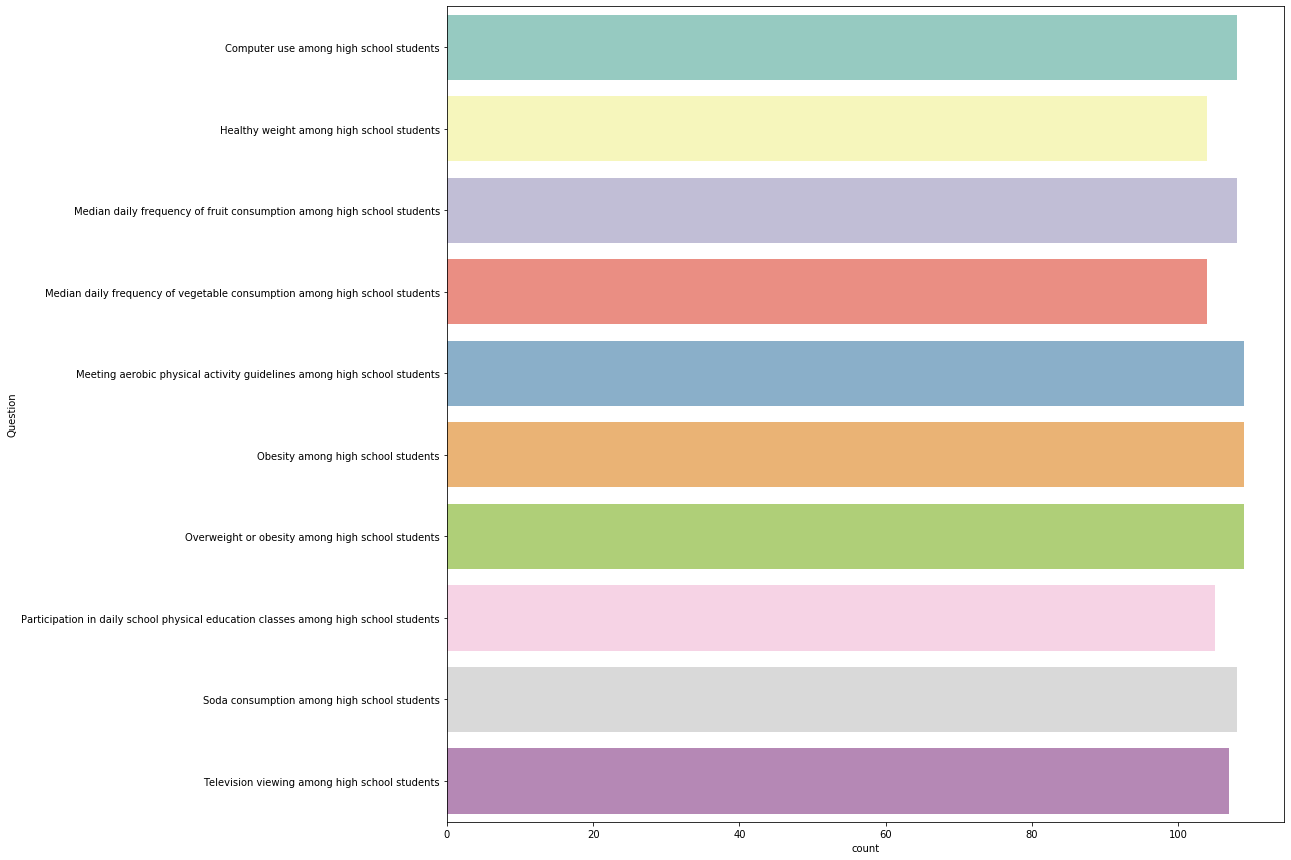

In [0]:
#visualization des questions
sns.countplot(y = 'Question', data = data, palette = 'Set3')
plt.show()


In [0]:
data.describe(include='all')

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,1071.00000,1071.00000,1071,1071,1071,1071,1071,0,1071,1071,825,825.000000,247,247,825.000000,825.000000,1071,1071,0,0,0,0,1051,0,1071.000000,1071,1071,1071,1071,1071,0,0,0,0
unique,NaN,NaN,55,55,1,1,10,0,2,2,493,NaN,2,2,NaN,NaN,1,1,0,0,0,0,54,0,NaN,1,10,2,1,1,0,0,0,0
top,NaN,NaN,WV,Washington,YRBSS,"Nutrition, Physical Activity, and Weight Status",Obesity among high school students,NaN,%,Crude Prevalence,1,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(64.84507995700051, -147.72205903599973)",NaN,NaN,NPAW,NPAW2_2,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
freq,NaN,NaN,20,20,1071,1071,109,NaN,859,859,48,NaN,246,246,NaN,NaN,1071,1071,NaN,NaN,NaN,NaN,20,NaN,NaN,1071,109,859,1071,1071,NaN,NaN,NaN,NaN
mean,2013.98226,2013.98226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.405176,NaN,NaN,23.076133,28.008473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.482726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.00031,1.00031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.927094,NaN,NaN,18.249590,19.531453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.956735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2013.00000,2013.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,0.300000,1.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.00000,2013.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,11.000000,15.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2013.00000,2013.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.400000,NaN,NaN,21.600000,27.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2015.00000,2015.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.800000,NaN,NaN,29.500000,36.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#On va detecter les "missing values et compter le total NaN de chaque colonne
data.isna().sum()

YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
DataSource                      0
Topic                           0
Question                        0
Response                     1071
DataValueUnit                   0
DataValueType                   0
DataValue                     246
DataValueAlt                  246
DataValueFootnoteSymbol       824
DatavalueFootnote             824
LowConfidenceLimit            246
HighConfidenceLimit           246
StratificationCategory1         0
Stratification1                 0
StratificationCategory2      1071
Stratification2              1071
StratificationCategory3      1071
Stratification3              1071
GeoLocation                    20
ResponseID                   1071
LocationID                      0
TopicID                         0
QuestionID                      0
DataValueTypeID                 0
StratificationCategoryID1       0
Stratification

In [0]:
#On va supprimer les colonnes qui contiennent des données manquantes 
data = data.drop(["Response","ResponseID","StratificationCategory2","Stratification2","StratificationCategory3",
                    "Stratification3","StratificationCategoryID2","StratificationID2","StratificationCategoryID3",
                    "StratificationID3"], axis =1)

In [0]:
#On va supprimer les 10 colonnes 
data.shape

(1071, 24)

In [0]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
47869,2015,2015,ME,Maine,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,38.3,38.3,NaN,NaN,36.4,40.3,Overall,Overall,"(45.254228894000505, -68.98503133599962)",23,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR
48071,2015,2015,MI,Michigan,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,40.6,40.6,NaN,NaN,37.3,44.0,Overall,Overall,"(44.6613195430005, -84.71439026999968)",26,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR
48152,2015,2015,MN,Minnesota,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,"(46.35564873600049, -94.79420050299967)",27,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR
48741,2015,2015,MO,Missouri,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,37.4,37.4,NaN,NaN,33.5,41.5,Overall,Overall,"(38.635790776000476, -92.56630005299968)",29,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR
48759,2015,2015,VA,Virginia,YRBSS,"Nutrition, Physical Activity, and Weight Status",Computer use among high school students,%,Crude Prevalence,41.9,41.9,NaN,NaN,39.4,44.3,Overall,Overall,"(37.54268067400045, -78.45789046299967)",51,NPAW,NPAW21_0,CrdPrev,OVERALL,OVR


In [0]:
data_topics = data.groupby(['Topic']).agg('Topic').count().sort_values(ascending = False)


In [0]:
#les topics de notre data
data_topics

Topic
Nutrition, Physical Activity, and Weight Status    1071
Name: Topic, dtype: int64

In [0]:
#autre maniére
data['Topic'].value_counts()

Nutrition, Physical Activity, and Weight Status    1071
Name: Topic, dtype: int64

- Les questions appartiennet au même topic " Nutrition, Physical Activity, and  Weight Status "

In [0]:
pd.crosstab(data['LocationDesc'], data['Topic'])



Topic,"Nutrition, Physical Activity, and Weight Status"
LocationDesc,
Alabama,20
Alaska,20
Arizona,20
Arkansas,20
California,19
Colorado,19
Connecticut,20
Delaware,19
District of Columbia,19


In [0]:
nutrition= data[data['Topic'].isin(['Nutrition, Physical Activity, and Weight Status'])]
pd.crosstab(nutrition['Question'], nutrition['LocationDesc'])


LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,United States,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Question,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Computer use among high school students,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2
Healthy weight among high school students,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
Median daily frequency of fruit consumption among high school students,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
Median daily frequency of vegetable consumption among high school students,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
Meeting aerobic physical activity guidelines among high school students,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
Obesity among high school students,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
Overweight or obesity among high school students,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2
Participation in daily school physical education classes among high school students,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,1,1,2,2,2,2,2
Soda consumption among high school students,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2


In [0]:


nutrition2= data[data['Topic'].isin(['Nutrition, Physical Activity, and Weight Status'])]
pd.crosstab(nutrition2['Question'], nutrition['DataValueAlt'])


In [0]:
data[['LocationDesc', 'Question','DataValueAlt']].sample(10)


,LocationDesc,Question,DataValueAlt
339612,Hawaii,Soda consumption among high school students,15.80
51064,New Hampshire,Soda consumption among high school students,13.00
339605,Colorado,Soda consumption among high school students,NaN
342081,New Jersey,Healthy weight among high school students,73.75
51021,Oregon,Participation in daily school physical educati...,NaN
50981,Wisconsin,Meeting aerobic physical activity guidelines a...,NaN
341161,Oklahoma,Computer use among high school students,43.00
342138,Nevada,Median daily frequency of fruit consumption am...,1.00
49213,Wisconsin,Computer use among high school students,NaN
335918,Colorado,Obesity among high school students,NaN


In [0]:
len(list(set(data['LocationAbbr'])))
#set valeurs uniques ==> liste ==> contenu

55

In [0]:
df=data[['LocationDesc', 'Question','DataValueAlt']]

In [0]:
df = df.sort_values(by=['LocationDesc'])


In [0]:
df

,LocationDesc,Question,DataValueAlt
339601,Alabama,Soda consumption among high school students,33.20
51962,Alabama,Overweight or obesity among high school students,33.60
53311,Alabama,Healthy weight among high school students,63.40
342105,Alabama,Median daily frequency of fruit consumption am...,1.00
342055,Alabama,Healthy weight among high school students,64.49
...,...,...,...
339544,Wyoming,Meeting aerobic physical activity guidelines a...,28.20
52395,Wyoming,Television viewing among high school students,21.00
50983,Wyoming,Meeting aerobic physical activity guidelines a...,27.10
335968,Wyoming,Obesity among high school students,10.70


In [0]:
df.Question.value_counts()


Obesity among high school students                                                     109
Meeting aerobic physical activity guidelines among high school students                109
Overweight or obesity among high school students                                       109
Computer use among high school students                                                108
Soda consumption among high school students                                            108
Median daily frequency of fruit consumption among high school students                 108
Television viewing among high school students                                          107
Participation in daily school physical education classes among high school students    105
Healthy weight among high school students                                              104
Median daily frequency of vegetable consumption among high school students             104
Name: Question, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


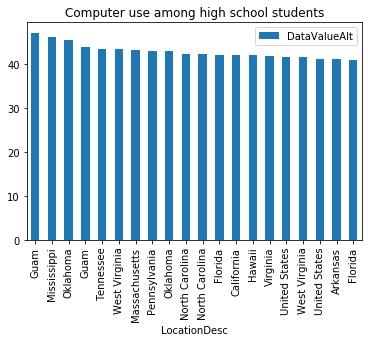

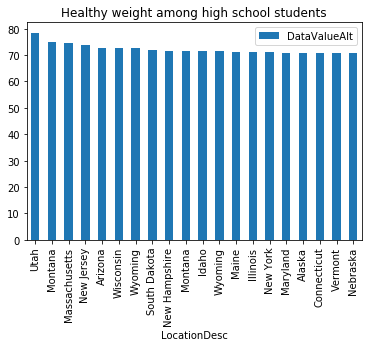

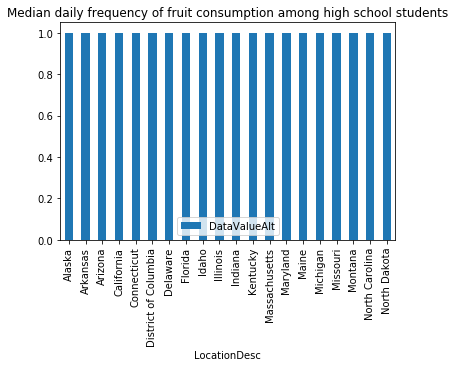

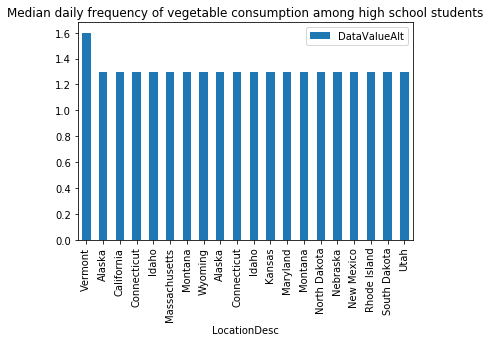

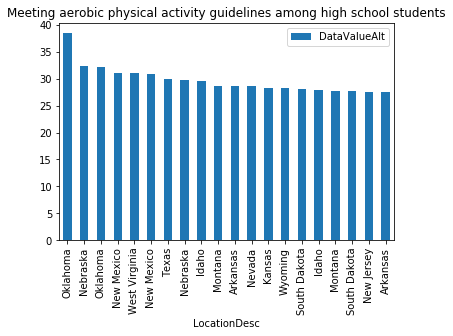

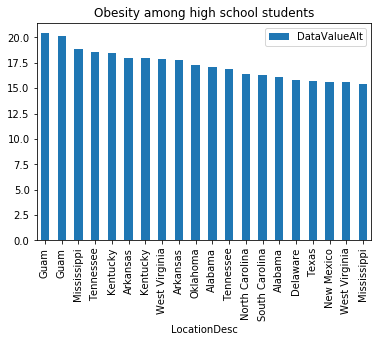

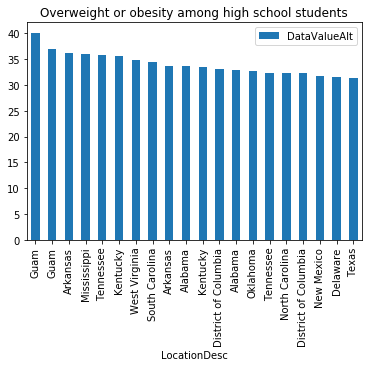

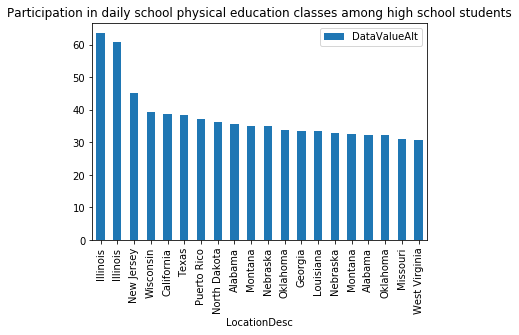

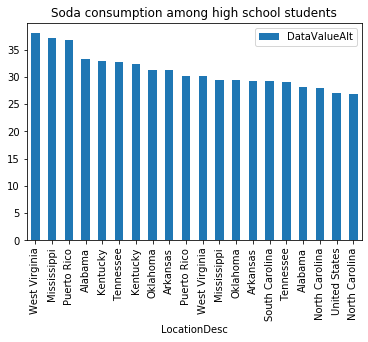

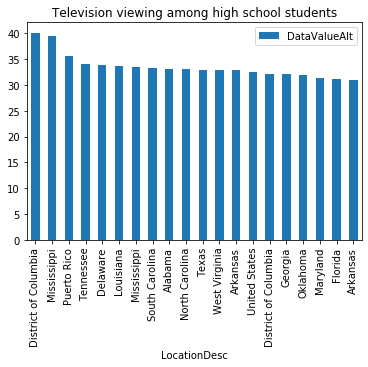

In [0]:
#Dans cette partie, j'ai essayé de déterminer le taux de chaque question dans les différents étatS  pour savoir s'il y a une tendance ou hétérogénéité entre ces états

for ques in questions:

  df=data[['LocationDesc', 'Question','DataValueAlt']]
  df = df[df.Question == ques]
  df.DataValue = df.loc[:,'DataValueAlt'].astype(float)
  myaxis = df.nlargest(20,'DataValueAlt').plot(x='LocationDesc', y='DataValueAlt', kind='bar')
  plt.title(ques)


In [0]:
dff=data[['YearStart',
       'Topic', 'Question', 'DataValueUnit',
       'DataValue',
       'LocationDesc']]

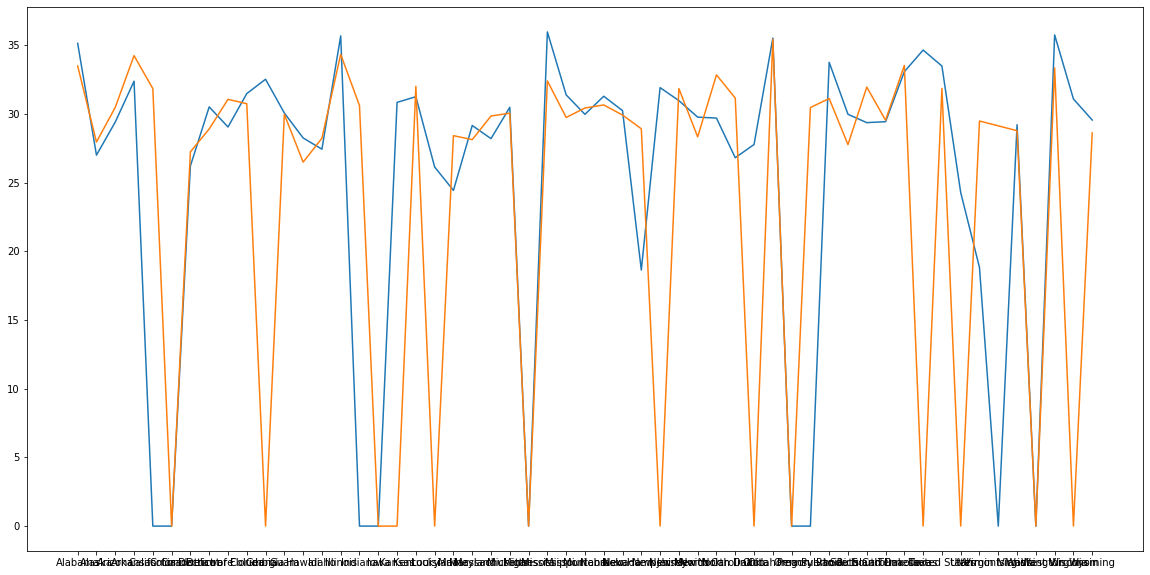

In [0]:
#ici j'ai voulu savoir la distribution entre 2015 et  2013 selon le DataValue et la localisation
t=dff[dff.DataValueUnit=='%'][['YearStart','DataValue','LocationDesc']]
t.DataValue=t.DataValue.astype(float)
t.DataValue=t.DataValue.fillna(value=0)

y=t[t['YearStart']==2015][['DataValue','LocationDesc']].groupby('LocationDesc').mean()
x=t[t['YearStart']==2013][['DataValue','LocationDesc']].groupby('LocationDesc').mean()

plt.figure(figsize=(20,10))
plt.plot(x.index,x)
plt.plot(y.index,y)

**Correlation sur les questions**

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

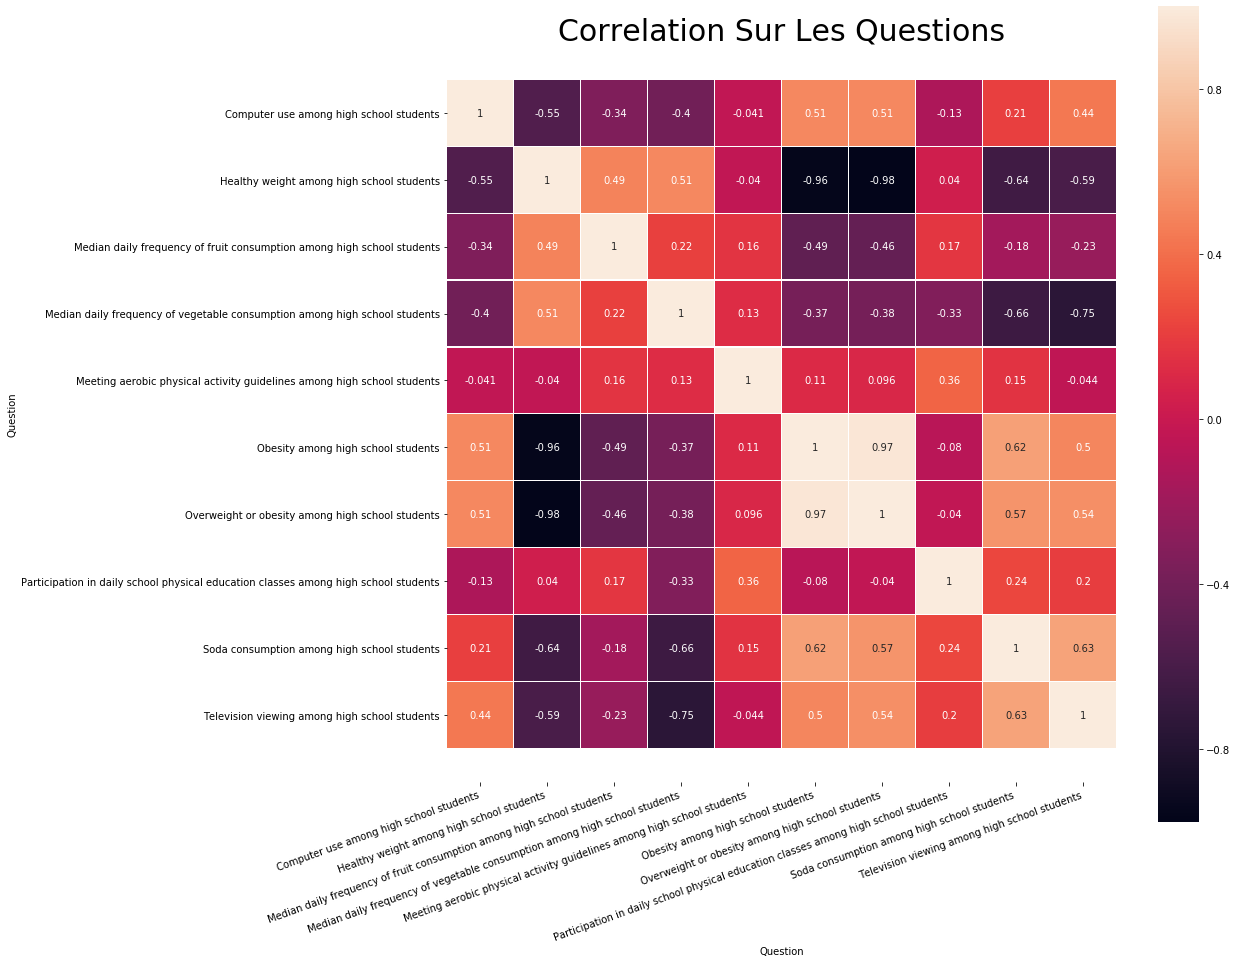

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
df = data.filter(['Question','LocationID','DataValueAlt'])
df2 = df.pivot_table(values='DataValueAlt',index=["LocationID"], 
                                 columns=['Question'])

plt.figure(figsize=(15,15))
plt.title('Correlation Sur Les Questions', size=30)
ax=sns.heatmap(df2.corr(),linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=20,horizontalalignment='right')

D'après cette figure, nous dégageons la correlation entre : 
- Obesity among high school students & Overweight or obesity among high school students


- Soda consumption among high school students & Overweight or obesity among high school students

- Soda consumption among high school students & Television viewing among high school students

- Overweight or obesity among high school students & Television viewing among high school students